In [1]:
!pip install keras

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

# from keras.datasets import imdb
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
# from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
#import keras
#from keras.layers import Input,Dense,Lambda
#from keras.models import Model
import os
import numpy as np
#from keras.preprocessing import image as image_p
#from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.vgg16 import VGG16
#import time
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
#from keras.preprocessing import image
from  matplotlib import pyplot
#from keras.layers.normalization import BatchNormalization
import cv2
#import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
#from keras.layers import Reshape
#import keras.backend as K
import numpy

In [3]:
!pip install imgaug

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import xmltodict, json
anno = os.listdir('annotations')
import imgaug as ia
from imgaug import augmenters as iaa

In [5]:
!readlink -f images/kusk fish/334. fish2701.jpg

/storage/thesis/fish-classification/images/kusk
/storage/thesis/fish-classification/fish2701.jpg


In [6]:
count_correct = 0
count_wrong = 0
labels =  []
images = []
bb = []
bboxes = []
image_sizes = []
for file in anno:
    #try:
    if(file.split(".")[-1]=='xml'):
        try:
            with open("annotations/"+file,'r') as f:
                text = f.read()
                d = xmltodict.parse(text)
                path = d['annotation']['path'].split("/home/parmeet/thesis/fish-classification/")[1]
                print(path)
                bgr_img = cv2.imread(path)
                img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(224,224))
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                bbox = obj['bndbox']
                rescaled_xmin = 1.*float(bbox['xmin'])/float(d['annotation']['size']['width'])
                rescaled_xmax = 1.*float(bbox['xmax'])/float(d['annotation']['size']['width'])

                rescaled_ymin = 1.*float(bbox['ymin'])/float(d['annotation']['size']['height'])
                rescaled_ymax = 1.*float(bbox['ymax'])/float(d['annotation']['size']['height'])
                bb.append(np.array([rescaled_xmin*224,rescaled_ymin*224,rescaled_xmax*224,rescaled_ymax*224]))
                
                bbs = ia.BoundingBoxesOnImage([
                    ia.BoundingBox(x1=rescaled_xmin*224, y1=rescaled_ymin*224, x2=rescaled_xmax*224, y2=rescaled_ymax*224)
                ], shape=img.shape)
                bboxes.append(bbs)
                labels.append(obj['name'])
                images.append(img)
                image_sizes.append((float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])))
                count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

images/caught lobster/lobster_cropped/352. gn-a00-06062016-lobster1_large.jpg
images/out of water halibut/223. avila+6-9+039.jpg
images/fresh caught jonah crab/BigJonah.jpg
images/kusk fish/20. seasons1.jpg
images/caught lobster/lobster_cropped/296. lobster-season-2012-opens-5-657x493_1.jpg
images/fresh caught jonah crab/324. 12734162_f520.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/SS2506918.jpg
images/cod caught/199. rod-harrison-releasing-a-mrray-cod-caught-at-the-gwydir-river-end-of-lake-copeton.jpg
images/out of water halibut/31. img-0559_1.jpg
images/cod caught/638. vermillion-cod.jpg
images/fresh caught jonah crab/d328e170ee3f660d40681fa9490e908a--outer-banks-north-carolina-south-carolina.jpg
images/cod caught/563. tania-with-cod-caught-at-serat.jpg
images/out of water halibut/817. homer-ocean-chraters-01.jpg
images/kusk fish/254. img_0054_thumb.jpg
images/caught lobster

images/caught lobster/lobster_cropped/83. video_youtube_fg4zhqzkrvs_1.jpg
images/cod caught/735. freshly-caught-cod-fish-black-plastic-crate-other-catches-fish-last-opening-his-mouth-gasped-98392606.jpg
images/cod caught/787. cinf1120east.jpg
images/out of water halibut/334. 300px-fishermen_with_their_halibut (1).jpg
images/out of water halibut/150. mark-andrew-halibut-135lb1 (1).jpg
images/cod caught/728. img_8589-2-750x903.jpeg
images/fresh caught jonah crab/greencrab_sil_lg.jpg
images/caught lobster/lobster_cropped/601. lobster_never_ages.jpg
images/kusk fish/1-s2.0-S0169534702024928-gr2.jpg
images/fresh caught jonah crab/72. 626-111_north_american_crab_300.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/477. r0_127_2200_1330_w1200_h678_fmax.jpg
images/cod caught/767. capecod06057.jpg
images/caught lobster/lobster_cropped/261. 20121031_fb_lobster02.jpg
images/kusk fish/330. lake-trout.jpg
im

images/caught lobster/lobster_cropped/126. 539w.jpg
images/kusk fish/43. 240_f_64462406_rr4oencpr0qfgdoh9i6un6uuacc8emiv.jpg
images/kusk fish/375. aug%205%202006%20pic%201.jpg
images/cod caught/165. 4c2b15e40b013969e469a21fca9e47ca_alex1213_1.jpg
images/fresh caught jonah crab/original.jpg
images/out of water halibut/735. 1464228_dfb18d3245fb187b90c58686ee6ecc97_thumb.jpg
images/caught lobster/lobster_cropped/539. a3.jpg
images/caught lobster/lobster_cropped/big_abc021a8671c95dcc0d852e476093309.jpg
images/cod caught/283. d4dd5eb6-8ea8-4ab8-aa20-9e381452323a.jpg
images/fresh caught jonah crab/overhead-view-green-shore-crab-260nw-1115441774.jpg
float division by zero
images/cod caught/434. copy%20of%20img_2431.jpg
images/fresh caught jonah crab/265. image?url=https%3a%2f%2fimg1.coastalliving.timeinc.net%2fsites%2fdefault%2ffiles%2fstyles%2f4_3_horizontal_inbody_900x506%2fpublic%2fimage%2f2016%2f09%2fmain%2fprimer_01_2.jpg%3fitok%3dzibdzrbq&w=700&q=85.jpg
images/caught lobster/lobster_cro

images/out of water halibut/349. fishing-halibut-cove-alaska-feature_orig.jpg
images/cod caught/250. ben_broadhurst_with_a_103cm_murray_cod-533x400.jpg
images/fresh caught jonah crab/Vampirkrabbe1.jpg
images/out of water halibut/550. canada-fly-in-fishing-trip-packages-773x1030.jpg
images/cod caught/204. image.jpg
images/caught lobster/lobster_cropped/582. crab%2blobster%2bpotting%2bbig%2bcatch%2bireland1.jpg
images/kusk fish/band-cusk-eel2.jpg
images/out of water halibut/570. alaska-fishing-limits-with-crazy-rays-adventures1 (4).jpg
images/caught lobster/lobster_cropped/30. e3759c24-d382-455f-8ec0-25f625dad7da-large16x9_lobsterboyz_1.jpg
images/fresh caught jonah crab/crab_sq_005.jpg
images/out of water halibut/81. 08-08-2010-many-fine-fish-plus-a-200-lbs-halibut.jpg
images/cod caught/164. dsc_0924.jpg
images/out of water halibut/290. giant-sargentflounder-e1444267035323.jpg
images/fresh caught jonah crab/165. fy7e5vph8cvk9k2.large.jpg
images/caught lobster/223. 1474618085082.jpg
Open

images/caught lobster/234. jack-miltonstaff-photographer-a-tote-full-of-justcaught-lobsters-lies-picture-id484455489?k=6&m=484455489&s=612x612&w=0&h=hloitzn7riwmigcsvxp0hrevp15fjadjm5ipr4labec=.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/253. murrumbidgee-river-murray-cod.jpg
images/caught lobster/lobster_cropped/depositphotos_60799797-stock-photo-raw-lobster.jpg
images/fresh caught jonah crab/50. gabe-the-fish-babe-crab-%c2%a9-morgan-ione-yeager.jpg
images/kusk fish/Cusk-eel_Newport.Pier_2003.jpg
images/fresh caught jonah crab/27377546970_c3236e64d3_b.jpg
images/fresh caught jonah crab/DSC05970.JPG
images/cod caught/182. a2b63cfbbae0e88cf540afce46ff16bd?width=1024.jpg
images/fresh caught jonah crab/111. 260px-fmib_51200_stone_crab_%28male%29.jpeg
images/out of water halibut/287. img_3673.jpg
images/out of water halibut/52. img_0172.jpeg
images/cod caught/341. chris%20mullarky%2015lb%20cod.

images/kusk fish/463. tn_fishing_trip_006.jpg
images/cod caught/435. dsc_4267.jpg
images/cod caught/579. paveys-3.3.16-93cm-660x.jpg
images/kusk fish/323. cusk_eel_236380292.jpg
images/out of water halibut/352. 8566792_orig.jpg
images/cod caught/39. winter-cod-4.jpg
images/fresh caught jonah crab/crab.gif
float division by zero
images/out of water halibut/761. harrier2.jpg
images/out of water halibut/91. commercial-halibut-fishing-by-hand-using-longline-gear-out-of-an-open-eacf05.jpg
images/fresh caught jonah crab/505. craig+gogan_about+to+go+in+the+pot.jpg
images/fresh caught jonah crab/northern_kelp_crab.jpg
images/fresh caught jonah crab/323. crab_fig3.jpg
images/cod caught/768. 62_31%20brooklyn%20vi%20cod%20%20and%20pollock%20aug%2024%202015.jpg
images/out of water halibut/125. 170901(01) (2).jpg
images/caught lobster/212. cotton-candy-lobster.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/

images/out of water halibut/277. fishingsmalld2.jpg
images/kusk fish/87. cusk1.jpg
images/fresh caught jonah crab/462. maxresdefault.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/236. crab-fb.jpg
images/kusk fish/215. brosme-brosme.jpg
images/fresh caught jonah crab/237. hemigrapsus_nudus.jpg
images/out of water halibut/629. 50607350w.jpg
images/out of water halibut/502. slide1-offshore-fishing.jpg
images/out of water halibut/377. groupshot.jpg
images/cod caught/538. 51994086-fresh-caught-cod-in-iceland.jpg
images/kusk fish/166. 30605515_617175251969787_91450724294066176_n.jpg
images/kusk fish/246. pink-ling-genypterus-sp.jpg
images/cod caught/362. 1446396914.png
images/fresh caught jonah crab/2-jonah-crab-andrew-j-martinez.jpg
images/cod caught/267. sam_0133.jpg
images/out of water halibut/86. 11eb594431eb49845912073efe11933c--going-fishing-fishing-tips.jpg
images/out of water h

images/out of water halibut/283. 2015-07-25-062.jpg
images/cod caught/751. 30lberonloneshark.jpg
images/cod caught/194. torsk19kg.jpg
images/fresh caught jonah crab/Female-Blue-Crab-2-300x220.jpg
images/caught lobster/lobster_cropped/oosterschelde-kreeft-10.jpg
images/cod caught/314. markus-guppy.jpg
images/caught lobster/lobster_cropped/120. the%20rare%20lobsters%20were%20all%20caught%20within%20the%20last%20month_2.jpg
images/fresh caught jonah crab/229. 4m46eq1whs.jpeg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/280. catch-2014-aug-bill-dantuono_2.jpg
images/caught lobster/lobster_cropped/living-lobster-isolated-on-white-background-X4BTEN.jpg
images/caught lobster/lobster_cropped/395. common_lobster_homarus_gammarus_20-09-14_4.jpg
images/caught lobster/12. big.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function 

images/caught lobster/lobster_cropped/476. lobster-frontoptionsxxlf5_1.jpg
images/caught lobster/lobster_cropped/200. 14%2bpound%2blobster%2b-%2b3%2bpic%2bfor%2bstory.jpg
images/fresh caught jonah crab/119. 488869736.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/5016757759_1d0794f4f7_b.jpg
images/kusk fish/399. 07-18-10-002.jpg
images/out of water halibut/774. f561-pacific-halibut-2-570x294.jpg
images/caught lobster/lobster_cropped/184. 9%20rare%20lobsters-14-41-pfr-color-2_2.jpg
images/out of water halibut/396. p1030356.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/196. 412886_478545-2015-0723-lobster-2.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/kevinlee_crab5b.jpg
images/

images/out of water halibut/660. halibutyellowtail0405 (1).jpg
images/caught lobster/lobster_cropped/124. tg-20012017-lobsters_large_1.jpg
images/kusk fish/300. ling-fresh-catch-2.jpg
images/caught lobster/lobster_cropped/man-fuel-food-blog-live-lobster.jpg
images/fresh caught jonah crab/565. stonecrab3.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/421. dscn1253_thumb.jpg
images/fresh caught jonah crab/609. 9094237.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/746. 5815609-a-fresh-caught-cod-fish-with-hook-in-it-s-mouth.jpg
images/cod caught/254. 6a097501b5457a4d6847da7f6e1b1082_menh814_1.jpg
images/fresh caught jonah crab/557. crab_fig4.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/135. 10552361

images/cod caught/730. 62_12a%20voyager%20nantucket%20cod%20pollock%20haddock%20white%20hake%20cod%20catch%20july%201%202%203.jpg
images/fresh caught jonah crab/5029608718_bbfe23f2aa.jpg
images/cod caught/442. image-134.jpeg
images/fresh caught jonah crab/578. snow-crab-cocktail-claws_lrg.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/stock-photo-a-crab-carcinus-maenas-on-a-sandy-beach-92714224.jpg
images/kusk fish/124. image_889_1.jpg
images/caught lobster/lobster_cropped/317. bluelobstersq.jpg
images/out of water halibut/57. 6-18-17%2b038.jpg
images/fresh caught jonah crab/571. medium_stone_crab_claws.png
images/cod caught/226. cod.jpg
images/out of water halibut/373. arthur_halibut_1.jpg
images/cod caught/448. 041-3.jpg
images/fresh caught jonah crab/769. puget-sound-dungeness-crab.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn =

images/out of water halibut/224. gmiller-hali.jpg
images/fresh caught jonah crab/2206.jpeg
images/cod caught/355. image-93.jpeg
images/out of water halibut/341. halibut-under-surface.jpg
images/cod caught/519. pacific_cod_caught_on_jigging_gear.jpg
images/kusk fish/481. img_0568.jpg
images/fresh caught jonah crab/Red_rock_crab_with_eggs.jpg
images/kusk fish/171. 35459218_231288944339383_8349097247224365056_n.jpg
images/fresh caught jonah crab/550. crabbing-main.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/381. peteysheader0921b.jpg
images/out of water halibut/150. mark-andrew-halibut-135lb1.jpg
images/kusk fish/Ophidion_barbatum_(Stefano_Guerrieri)_1.jpg
images/cod caught/15. cod-success.jpg
images/fresh caught jonah crab/Jensen-EGC-300x205.png
images/out of water halibut/298. maxresdefault (1).jpg
images/cod caught/334. r0_116_537_868_w1200_h678_fmax.jpg
images/caught lo

images/caught lobster/177. rocky-bottoms-fresh-caught.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/74. jonah_crab_02.jpg
images/out of water halibut/141. haliboys (3).jpg
images/cod caught/664. cod-atlantic-cod-codling-gadus-morhua-fisherman-holding-a-caught-animal-close-to-his-face-imitating-its-open-mouth-norway-flatanger-x5bmdy.jpg
images/cod caught/353. he-caught-his-biggest-murray-cod-casting-a-lure.jpg
images/cod caught/778. 62_feb%2011%202012%20viking%201.jpg
images/caught lobster/lobster_cropped/stock-photo-raw-canadian-lobster-on-white-background-for-tom-yum-goong-589337882.jpg
images/out of water halibut/411. 5421029112_3d93d0619ae09fbd869ab85d82be58cf.jpg
images/fresh caught jonah crab/556. russiankingcrab.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/496. dsc_3897

images/caught lobster/lobster_cropped/454a19fe0c91a7ca2b38cb00d621b646.jpg
images/caught lobster/lobster_cropped/113. image-21_1.jpg
images/out of water halibut/401. p1000417 (2).jpg
images/out of water halibut/512. nin2 (4).jpg
images/fresh caught jonah crab/crab-screenshot22.png
images/caught lobster/lobster_cropped/american-lobster-homarus-americanus-16562784.jpg
images/caught lobster/lobster_cropped/lobster-21406555.jpg
images/kusk fish/236. brotula_multibarbata,i_rr2741.jpg
images/caught lobster/lobster_cropped/108. image-placeholder-title.jpg
images/fresh caught jonah crab/17. ftoy0s452oewzmgvkb.large.jpg
images/cod caught/65. michael+cod.jpg
images/fresh caught jonah crab/649. 180s.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/3359452941_6799cd5cfa.jpg
images/cod caught/560. depositphotos_155673140-stock-video-hands-cut-fresh-cod-fish.jpg
images/fresh caught jonah crab/67.

images/caught lobster/lobster_cropped/lobster132.png
images/out of water halibut/443. img_4024.jpg
images/cod caught/214. frankie-cod-4-00004-413x750.jpg
images/fresh caught jonah crab/385. img_3965.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/163. maxresdefault.jpg
images/fresh caught jonah crab/632. 150144-0602lobster1.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/431. captain%20bill%20with%20halibut.jpg
images/cod caught/6. winter-cod-10.jpg
images/out of water halibut/765. 9721337.jpg
images/kusk fish/14. kt-togue-red.jpg
images/caught lobster/194. lobsters1.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/331. crested-cusk-eel.jpg
images/cod caught/72. two-fish-caught-on-a-single-line-fishing-f

images/caught lobster/lobster_cropped/496. 9c371021ee866dd6158a2fd2cd6ff6ca.jpg
images/cod caught/50. cod004.jpg
images/fresh caught jonah crab/509. dungeness-crab-color.jpg
images/out of water halibut/170. img_1713 (1).jpg
images/fresh caught jonah crab/677. stonecrab1.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/Opscr_u0.jpg
images/out of water halibut/32. halibutkingsalmoncombo (1).jpg
images/caught lobster/lobster_cropped/260. lobster_background.jpg
images/kusk fish/216. 1-cusk-eel-penopus-microphthalmus-dant-fenolio.jpg
images/out of water halibut/753. 6_27_07_calicobass.jpg
images/out of water halibut/127. img-20150125-wa0001_t-1.jpg
images/kusk fish/200. img_0466-e1474380468214.jpg
images/caught lobster/lobster_cropped/41. white-lobster-ht-03-jpo-170901_4x3_992.jpg
images/out of water halibut/409. full_house.jpg
images/kusk fish/78. 480px-brosme_brosme.jpg
images/fresh caught jonah cra

images/caught lobster/lobster_cropped/96. net08n-b88254041z.120141109192414000g7b65nln.20_2.jpg
images/fresh caught jonah crab/crab3.png
images/caught lobster/lobster_cropped/lobstersdas.jpg
images/caught lobster/lobster_cropped/dd4964c388b07e72e2c8bb6d6d44679f--lobster-art-rock-lobster.jpg
images/caught lobster/lobster_cropped/363. 93yyht76zuty_3.jpg
images/caught lobster/lobster_cropped/248. blue-lobster-caught-off-maine.jpg
images/out of water halibut/231. mega-bite-catching-halibut-300x225.jpg
images/cod caught/470. scn_22-03-2013_coast_life_02_lukemccombe89cmjewmaroochy_fct1024x630x48_ct677x380.jpg
images/caught lobster/lobster_cropped/268. blue_lobster_dn02_1.jpg
images/out of water halibut/13. img_1874.jpg
images/fresh caught jonah crab/C021-Red-Rock-Crab-2-570x422.jpg
images/fresh caught jonah crab/P1080955.JPG
images/out of water halibut/39. dscn0543-e1326587536329-1024x665.jpg
images/fresh caught jonah crab/10058221_H16107193.JPG
images/kusk fish/100. 102016604.jpg
images/kus

images/out of water halibut/423. slideshow-02.jpg
images/caught lobster/111. translucent_lobster.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/644. 440px-ranina_ranina.jpg
images/kusk fish/346. 722186fcb540712d0a7bf42a0f21e18b--fishing.jpg
images/fresh caught jonah crab/green_crab.gif
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/78. dscn1564.jpg
images/out of water halibut/439. paul%20and%20albert%20with%20141lb%20hali%20sept.%202009.jpg
images/caught lobster/lobster_cropped/live-lobsters-on-algae-white-260nw-93035716.jpg
float division by zero
images/cod caught/572. 5e59c69e00762d7a5072716907029a04_alexcodbait_4.jpg
images/fresh caught jonah crab/145. claspingcrabs6.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function c

images/kusk fish/48. 70104431-fisherman-is-holding-nice-fish.jpg
images/caught lobster/lobster_cropped/551. big-lobster-2841880_large.jpg
images/kusk fish/274. rick_davidson_cobia-1.jpg
images/cod caught/408. stevecod.jpg
images/out of water halibut/266. img_3676.jpg
images/kusk fish/388. 676_2238.jpg
images/out of water halibut/810. 2017_june-7-john-douglas-channel-halibut-over-50lbs.-e1496945445560.jpg
images/cod caught/740. image-137.jpeg
images/kusk fish/397. 23825-280x280.jpg
images/caught lobster/180. freshly-steamed-lobsters-pile-seven-ready-feasting-x-79905675.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/420. 263283.jpg
images/caught lobster/lobster_cropped/dsc09331.jpg
images/fresh caught jonah crab/a-red-rock-crab-or-sally-lightfoot-crabgrapsus-grapsus-JWCC62.jpg
images/caught lobster/lobster_cropped/236. med_gallery_176_104_1323698534_13188_1.jpg
images/fresh caught jonah crab/4. f

images/out of water halibut/626. 42 (1).jpg
images/cod caught/127. fishing-iceland-sudavik-boat-0004.jpg
images/caught lobster/lobster_cropped/358. fisherman-andres-arraya-measures-a-lobster-caught-03-october-2005-in-picture-id55851647?k=6&m=55851647&s=612x612&w=0&h=gm5iax1iz6gpssffyzvlqzmrr-j7dbvw4dpjjuczjz0=.jpg
images/cod caught/288. 4lb%2520bass.jpg
images/fresh caught jonah crab/642. image00102.jpg
images/cod caught/478. tube.jpg
images/cod caught/646. dsc_00031.jpg
images/caught lobster/lobster_cropped/96. net08n-b88254041z.120141109192414000g7b65nln.20_1.jpg
images/caught lobster/lobster_cropped/CalicoLob3.jpg
images/out of water halibut/466. index.11.jpg
images/cod caught/527. cod_on_fly.jpg
images/fresh caught jonah crab/1-atlantic-rock-crab-maine-jennifor-idol-canvas-print.jpg
images/fresh caught jonah crab/CarcinusMaenusIainMcGaw.jpg
images/fresh caught jonah crab/36. ac998d571db8357e9944110276314375.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-

images/caught lobster/lobster_cropped/boston-lobster-live-dark-green-spots-large-pincers-44105226.jpg
images/cod caught/90. r0_0_5312_2904_w1200_h678_fmax.jpg
images/cod caught/113. caddaye%20cod_29333530-5649-11e3-a266005056a302e6.jpg
images/cod caught/28. murray-cod-caught-on.jpg
images/fresh caught jonah crab/Screen-shot-2016-05-24-at-3.27.39-PM.png
images/kusk fish/175. hold7.gif
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/fresh caught jonah crab/269. crab-sex-identification.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/642. img_4722.jpg
images/kusk fish/422. mpolylepis_big.jpg
images/cod caught/568. hqdefault.jpg
images/kusk fish/134. img_1285.jpg
images/fresh caught jonah crab/158. 1200px-portunus_pelagicus_male.jpg
images/kusk fish/16. genypterus-blacodes.jpg
images/out of water halibut/107. 1-2

images/kusk fish/676_4359.jpg
images/cod caught/509. cod%20tagging%20poster%20dec.jpg
images/fresh caught jonah crab/3-jonah-crab-with-eggs-andrew-j-martinez.jpg
images/out of water halibut/218. salmon (1).jpg
images/kusk fish/images (1).jpeg
images/cod caught/483. 4492038.jpg
images/cod caught/59. w1200_h678_fmax.jpg
images/fresh caught jonah crab/bwi-bs357328.jpg
images/out of water halibut/224. gmiller-hali (2).jpg
images/kusk fish/299. barbed-cusk-eel-snake-blenny-ophidion-barbatum-searching-food-on-sea-aggr2e.jpg
images/cod caught/385. cinf0107eh.jpg
images/out of water halibut/464. rud-199x223.png
images/kusk fish/348. ss2807330.jpg
images/kusk fish/196. cusk.jpg
images/cod caught/233. fish-bragboard-rankin-cod-exmouth-wa-1.jpg
images/out of water halibut/18. large05 (2).jpg
images/out of water halibut/180. b9509cda-f5ca-4031-83a6-d11c67c62350.jpeg
images/out of water halibut/347. fishing_12.jpg
images/out of water halibut/548. fresh-caught-wild-west-coast-halibut-happy-guests.jp

images/fresh caught jonah crab/734. crabs_2016_16.jpg
images/caught lobster/lobster_cropped/608. hqdefault.jpg
images/kusk fish/cusk-eel0.jpg
images/caught lobster/164. 8437.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/375. lobster-3_4.jpg
images/caught lobster/120. the%20rare%20lobsters%20were%20all%20caught%20within%20the%20last%20month.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/397. depositphotos_114203040-stock-photo-fresh-cod-caught.jpg
images/kusk fish/27. cusk-fish-27594304.jpg
images/caught lobster/lobster_cropped/2. maxresdefault_3.jpg
images/out of water halibut/152. 6726830.jpg
images/fresh caught jonah crab/20171113_192243.jpg
images/fresh caught jonah crab/green-shore-crab-green-crab-north-atlantic-shore-crab-carcinus-maenas-ebkx7m.jpg
images/out of water halibut

images/out of water halibut/569. dsc00416_ezr.jpg
images/fresh caught jonah crab/657. crabs3.png
images/fresh caught jonah crab/slide2-n.jpg
images/caught lobster/145. 1009150_1_1019-lobster-statue_standard.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/kusk fish/195. ss2807333.jpg
images/out of water halibut/131. img_5195.jpg
images/out of water halibut/635. elmer%20fish%202.jpg
images/cod caught/9. article-2101638-11bee200000005dc-742_634x452.jpg
images/out of water halibut/442. kristi%20halibut%20resized%20wwf.jpg
images/cod caught/445. robfrye_biggest-cod.jpg
images/out of water halibut/772. maxresdefault.jpg
images/fresh caught jonah crab/37835_cancer-irroratus---rock-crab.jpg
images/caught lobster/lobster_cropped/176. 140906_wmtw_lobster_24x13_992.jpg
images/fresh caught jonah crab/296c54cd0d8004a61f3a05de84a7b5d3.jpg
images/kusk fish/86. faceless-cusk-john-pogonoski-anfc.jpg
images/out of water ha

images/cod caught/287. codfishing987.jpg
images/cod caught/87. agust50kgcod.jpg
images/out of water halibut/416. img_5029.jpg
images/caught lobster/lobster_cropped/83. video_youtube_fg4zhqzkrvs_2.jpg
images/kusk fish/347. 34-700x400.jpg
images/cod caught/738. ken%20morsie%20cod_868c6eb0-1306-11e5-a74f02e22d9e6a7f.jpg
images/cod caught/309. mick_001.jpg
images/out of water halibut/230. 2018-halibut-update2-600x555.jpg
images/out of water halibut/192. halibut_rapala-e1340846290258.jpg
images/caught lobster/lobster_cropped/Lavish-Lobster-Macaroni-Bake-1.jpg
images/out of water halibut/757. mg_5937.jpg
images/caught lobster/lobster_cropped/150. 001_1.jpg
images/out of water halibut/810. 2017_june-7-john-douglas-channel-halibut-over-50lbs.-e1496945445560 (1).jpg
images/caught lobster/lobster_cropped/357. mxny2c-b781231708z.120131211141559000ggl1hfhh5.2.jpg
images/fresh caught jonah crab/9b431cf6110d3b8a5895901e28b4c61c--crabs-rock.jpg
images/out of water halibut/367. slide7.jpg
images/fresh

images/cod caught/456. 13580088_f520.jpg
images/kusk fish/104. 7872-004-82114c0f.jpg
images/out of water halibut/77. jesse-with-2-halibut-big-photo-for-page-22.jpg
images/out of water halibut/586. kyuquot-sound-halibut-at-the-ship-with-two-men.jpg
images/caught lobster/lobster_cropped/347. albino-lobsters_3.jpg
images/fresh caught jonah crab/01_jms_RedRockCrab_90p_P6020354_tmb.jpg
images/cod caught/755. 90f2f6abc7a2ade28baf826d527b43d8_alex613_2.jpg
images/fresh caught jonah crab/1e4f2bd20137641b6f389de4b1e4a7c5.jpg
images/fresh caught jonah crab/451. 30258_dungeness_crab_inline-image_9.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/221. cod-caught-while-ice.jpg
images/caught lobster/lobster_cropped/324. photo-cmsmsid16209257.jpg
images/caught lobster/lobster_cropped/41935-lobster.JPG
images/cod caught/523. 312500053_b613b63aba.jpg
images/kusk fish/47. tn_fishing_trip_014.jpg
images/kusk fish/

images/kusk fish/369. cuskeel-hires.jpg
images/fresh caught jonah crab/497. 140927-f-fz712-004.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/103. lobster-2_2.jpg
images/out of water halibut/337. p1010273.jpg
images/caught lobster/lobster_cropped/39068_homarus-americanus---american-lobster.jpg
images/out of water halibut/281. ucluelet-bc-fishing-halibut (1).jpg
images/caught lobster/lobster_cropped/riggy_lobster.jpg
images/cod caught/238. barramundi_cod.jpg
images/cod caught/790. stock-photo-dead-cod-and-pollock-fish-caught-by-fisherman-laying-in-the-gravel-on-the-beach-110660489.jpg
images/caught lobster/lobster_cropped/case-study-maximising-rock-lobster-subpage-lobster.jpg
images/cod caught/454. fsh_tt80_kl7_kent-walker-lightroom.jpg
images/fresh caught jonah crab/RedRockCrabLg.jpg
images/cod caught/344. 348s.jpg
images/out of water halibut/250. fishin2.jpg
images/out of 

images/caught lobster/lobster_cropped/417. news-blue-lobster.jpg
images/cod caught/404. statelibqld_2_182771_large_rock_cod_caught_at_the_white_patch%2c_bribie_island%2c_1936.jpg
images/kusk fish/172. striped%20cusk%20eel%20female.jpg
images/fresh caught jonah crab/red_rock_crab_300.jpg
images/kusk fish/140. 28678-deep-sea-fish-cusk-eel.jpg
images/caught lobster/lobster_cropped/mainphoto71698.jpg
images/kusk fish/394. cusk-eel-squid-bite.jpg
images/caught lobster/lobster_cropped/20103079-raw-lobster.jpg
images/fresh caught jonah crab/2-atlantic-rock-crab-andrew-j-martinez.jpg
images/out of water halibut/563. dscn0975 (2).jpg
images/kusk fish/469. 62_41%20kevin%20with%20big%20wolfish.jpg
images/kusk fish/279. aug%205%202006%20pic%203.jpg
images/kusk fish/bbb.jpg
images/out of water halibut/401. p1000417.jpg
images/kusk fish/cusk-eel-juvenile-20180609-120108.jpg
images/caught lobster/lobster_cropped/375. lobster-3_2.jpg
images/out of water halibut/5. halibut-slider_1.jpg
images/caught lo

images/fresh caught jonah crab/0445.jpeg
images/out of water halibut/830. halibut-fishing-img_1798 (1).jpg
images/caught lobster/lobster_cropped/232. 10004141_h7975727-600x427_3.jpg
images/fresh caught jonah crab/20855566239_fd006483dd_o.jpg
images/caught lobster/lobster_cropped/186. local-lobster-1_2.jpg
images/caught lobster/lobster_cropped/197. mainelobster.jpg
images/fresh caught jonah crab/590. 13-dungeness-crab-bar-avignon_wnthew.jpg
images/caught lobster/lobster_cropped/459. lobster.jpg
images/fresh caught jonah crab/314. 5524736_f520.jpg
images/out of water halibut/82. halibut-fishing (1).jpg
images/out of water halibut/15. 20160515_100430-1024x576.jpg
images/cod caught/636. tuna28.jpg
images/fresh caught jonah crab/600. kingcrab01__89532.1479745269.500.750.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/lobster_cropped/540. wni1ckplw346cd040rfd3.jpg
images/out of water halibut/313.

images/cod caught/608. image.jpg
images/cod caught/306. 530wm.jpg
images/out of water halibut/156. 211_2012-05-19_12-00-57_930 (4).jpg
images/fresh caught jonah crab/273. rock_crab_02.jpg
images/fresh caught jonah crab/IMG_3667r.JPG
images/fresh caught jonah crab/368. 1200px-alaskan_king_crab.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/564. george%20halibut.jpg
images/kusk fish/224. 6151d99e2732adba7105380f68e709cf.jpg
images/cod caught/137. ingressimage_storfisker_greta_0.jpg
images/out of water halibut/514. big-catch-at-canadian-fishing-vacations-and-charters-1030x1030.jpg
images/kusk fish/cusk-eel_david-dirig.jpg
images/caught lobster/lobster_cropped/97. sn4-jay-the-lobster.jpg
images/fresh caught jonah crab/Marsh_Crab_page_image.jpg
images/kusk fish/432. 1-s2.0-s0169534702024928-gr2.jpg
images/kusk fish/372. cusk.jpeg
images/caught lobster/lobster_cropped/196. 412886_478545-20

images/out of water halibut/333. olsen-gangweb-600x450 (7).jpg
images/kusk fish/208. saccogasttubcsiro.jpg
images/caught lobster/lobster_cropped/22. 0616-giant-lobster_2.jpg
images/caught lobster/lobster_cropped/351. original.jpg
images/out of water halibut/213. bennyaaronmatthalibut.jpg
images/cod caught/269. dsc_0656.jpg
images/fresh caught jonah crab/3. crabs-crab-crabmeat-freshly-caught-seafood-sea-food-outdoors-in-sunshine-abgm60.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/out of water halibut/572. img_0670.jpg
images/cod caught/733. r0_0_3264_2154_w1200_h678_fmax.jpg
images/out of water halibut/434. andre-halibut.jpg
images/fresh caught jonah crab/519. mad_boiler.0.0.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/caught lobster/207. an-incredibly-rare-orange-lobster-has-been-caught-by-fishermen-on-the-inner-hebrid

images/out of water halibut/98. 17092456_1581911895170205_1126584035_n (2).jpg
images/cod caught/561. murray+cod+australia+big+huge+world+record+igfa+giante+pesce+biggest+fishes+fish+of+the+world+pesce+enorme+gigante+big+fishes+of+the+ocean+of+the+sea+big+fish+of+the+world+best+images+2.jpg
images/caught lobster/lobster_cropped/spiny-lobster.png
images/out of water halibut/755. 013 (1).jpg
images/kusk fish/120. 13_cusk.jpg
images/caught lobster/lobster_cropped/144. a%20rare%20red%20lobster-l.jpg
images/out of water halibut/158. hqdefault (1).jpg
images/caught lobster/150. 001.jpg
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

images/cod caught/242. 6095776.jpg
images/cod caught/159. danfishingpic_t658.jpg
images/kusk fish/316. 240_f_64462529_g8smqilajqju3ohdi8xhihphxoururm0.jpg
images/cod caught/708. 20120906_fishcodsept6.jpg
images/caught lobster/lobster_cropped/347. albino-lobsters_2.jpg
images/kusk fish/137. 7-1

images/caught lobster/lobster_cropped/Live-and-Frozen-Red-Spiny-Lobster.jpg
images/out of water halibut/505. fresh-caught-vancouver-island-halibut-happy-fishermen.jpg
images/fresh caught jonah crab/651. how-to-buy-clean-and-cook-crabs-4-methods-plus-recipes.jpg
images/cod caught/546. lee%20townsend%20149cm%20610.jpg
images/kusk fish/410. dsc_09141-640x425.jpg
images/caught lobster/lobster_cropped/368. spiny%20lobster%20oman%20alive(1).jpg
images/out of water halibut/450. 20130727_0005.jpg
images/out of water halibut/320. halibut-fishing-port-hardy (4).jpg
images/fresh caught jonah crab/472. wild-caught-sustainable-maine-lobster.png
images/fresh caught jonah crab/C005-Green-Crab-2-570x463.jpg
images/fresh caught jonah crab/spooky-hawaiian-crab-stock-image-406455.jpg
images/fresh caught jonah crab/01375573.jpg
images/fresh caught jonah crab/317. mud-crab.jpg
images/out of water halibut/18. large05.jpg
images/kusk fish/186. mikespike-300x225.jpg
images/out of water halibut/72. halibut-321

In [7]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [8]:
i = 0
indexes = []
for idx,lb in enumerate(labels):
    if (lb=='crab' or lb=='lobster' or lb=='cod' or lb=='kusk' or lb=='halibut'):
        indexes.append(idx)

In [9]:
bboxes = list(np.array(bboxes)[indexes])
labels =  list(np.array(labels)[indexes])
images = list(np.array(images)[indexes])
image_sizes = list(np.array(image_sizes)[indexes])

In [10]:
num_labels = len(np.unique(list(labels)))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(labels))
le_labels = le.transform(labels)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
numpy.save('classes.npy', le.classes_)

In [11]:
def augment_images(images,bboxes,labels,image_sizes,times):
    all_bboxes = []
    all_images = list(images)
    all_labels = list(labels.toarray())
    all_image_sizes = list(image_sizes)

    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels.toarray())
        all_image_sizes = all_image_sizes + list(image_sizes)
        
    return all_images,all_bboxes,all_labels,all_image_sizes

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []

kfold_data = []

i = 0
for train, test in kf.split(images):
    i = i + 1
    print(i)
    all_images,all_bboxes,all_labels,all_image_sizes = augment_images(np.array(images)[train],np.array(bboxes)[train],one_labels[train],np.array(image_sizes)[train],2)
    test_bboxes = []
    for bbs in list(np.array(bboxes)[test]):
            test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    kfold_data.append([all_images,all_bboxes,all_labels,all_image_sizes,np.array(images)[test],test_bboxes,one_labels[test],np.array(image_sizes)[test]])

1
2
3
4
5


In [37]:
with open('data-localize0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-localize1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-localize2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-localize3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-localize4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [24]:
temp  = int(len(kfold_data[0][0])/3)

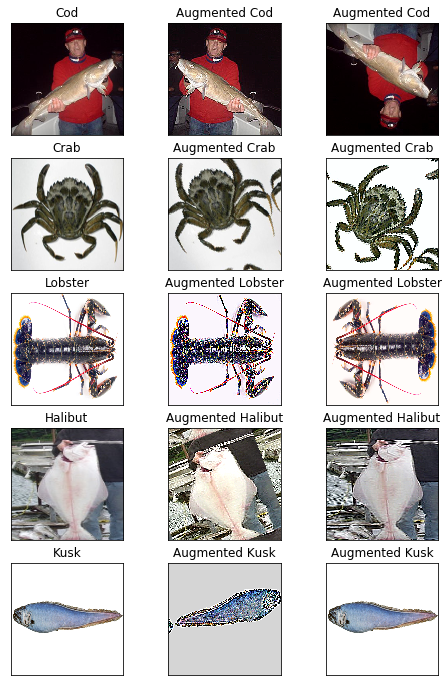

In [168]:
idx= 10
fig, ax = plt.subplots(figsize=(8,12))

plt.subplot(5, 3, 1)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Cod')


plt.subplot(5, 3, 2)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Cod')

plt.subplot(5, 3, 3)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Cod')

idx= 17

plt.subplot(5, 3, 4)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Crab')


plt.subplot(5, 3, 5)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Crab')

plt.subplot(5, 3, 6)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Crab')

idx= 24

plt.subplot(5, 3, 7)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Lobster')


plt.subplot(5, 3, 8)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Lobster')

plt.subplot(5, 3, 9)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Lobster')

idx = 206

plt.subplot(5, 3, 10)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Halibut')


plt.subplot(5, 3, 11)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Halibut')

plt.subplot(5, 3, 12)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Halibut')


idx = 215

plt.subplot(5, 3, 13)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Kusk')


plt.subplot(5, 3, 14)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Kusk')

plt.subplot(5, 3, 15)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Kusk')


plt.savefig('image_augmentation.jpg')
plt.show()


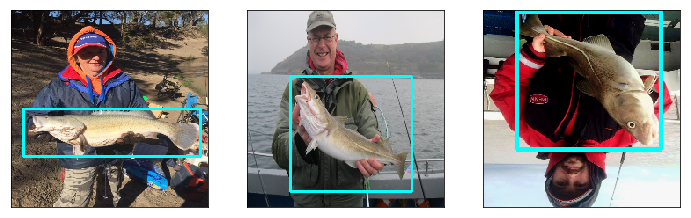

In [319]:
fig, ax = plt.subplots(figsize=(12,15))



plt.subplot(1, 3, 1)
idx = 10
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
idx = 602
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
idx = 4008
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.savefig('axis_aligned_bounding_boxes.jpg')
plt.show()

In [181]:
pt2

(128, 170)